In [1]:
import urllib.request
import json
import math
import matplotlib.pyplot as plt

In [2]:
#START-END POINT
P1=[21.422510,39.826168]
P2=[24.470901,39.612236]

#NUMBER OF POINTS
s=100
interval_lat=(P2[0]-P1[0])/s #interval for latitude
interval_lon=(P2[1]-P1[1])/s #interval for longitude

#SET A NEW VARIABLE FOR START POINT
lat0=P1[0]
lon0=P1[1]

#LATITUDE AND LONGITUDE LIST
lat_list=[lat0]
lon_list=[lon0]

#GENERATING POINTS
for i in range(s):
    lat_step=lat0+interval_lat
    lon_step=lon0+interval_lon
    lon0=lon_step
    lat0=lat_step
    lat_list.append(lat_step)
    lon_list.append(lon_step)

In [3]:
#HAVERSINE FUNCTION
def haversine(lat1,lon1,lat2,lon2):
    lat1_rad=math.radians(lat1)
    lat2_rad=math.radians(lat2)
    lon1_rad=math.radians(lon1)
    lon2_rad=math.radians(lon2)
    delta_lat=lat2_rad-lat1_rad
    delta_lon=lon2_rad-lon1_rad
    a=math.sqrt((math.sin(delta_lat/2))**2+math.cos(lat1_rad)*math.cos(lat2_rad)*(math.sin(delta_lon/2))**2)
    d=2*6371000*math.asin(a)
    return d

#DISTANCE CALCULATION
d_list=[]
for j in range(len(lat_list)):
    lat_p=lat_list[j]
    lon_p=lon_list[j]
    dp=haversine(lat0,lon0,lat_p,lon_p)/1000 #km
    d_list.append(dp)
d_list_rev=d_list[::-1] #reverse list

In [4]:
#CONSTRUCT JSON
d_ar=[{}]*len(lat_list)
for i in range(len(lat_list)):
    d_ar[i]={"latitude":lat_list[i],"longitude":lon_list[i]}
location={"locations":d_ar}
json_data=json.dumps(location,skipkeys=int).encode('utf8')

#SEND REQUEST 
url="https://api.open-elevation.com/api/v1/lookup"
response = urllib.request.Request(url,json_data,headers={'Content-Type': 'application/json'})
fp=urllib.request.urlopen(response)

In [5]:
#RESPONSE PROCESSING
res_byte=fp.read()
res_str=res_byte.decode("utf8")
js_str=json.loads(res_str)
#print (js_mystr)
fp.close()

#GETTING ELEVATION 
response_len=len(js_str['results'])
elev_list=[]
for j in range(response_len):
    elev_list.append(js_str['results'][j]['elevation'])

#BASIC STAT INFORMATION
mean_elev=round((sum(elev_list)/len(elev_list)),3)
min_elev=min(elev_list)
max_elev=max(elev_list)
distance=d_list_rev[-1]

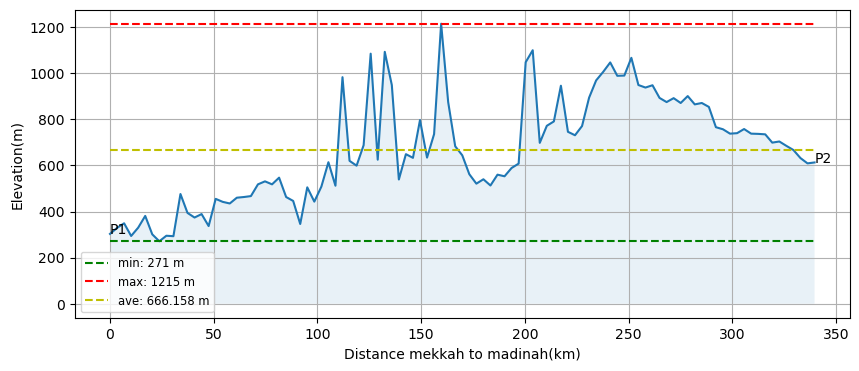

In [6]:
#PLOT ELEVATION PROFILE
base_reg=0
plt.figure(figsize=(10,4))
plt.plot(d_list_rev,elev_list)
plt.plot([0,distance],[min_elev,min_elev],'--g',label='min: '+str(min_elev)+' m')
plt.plot([0,distance],[max_elev,max_elev],'--r',label='max: '+str(max_elev)+' m')
plt.plot([0,distance],[mean_elev,mean_elev],'--y',label='ave: '+str(mean_elev)+' m')
plt.fill_between(d_list_rev,elev_list,base_reg,alpha=0.1)
plt.text(d_list_rev[0],elev_list[0],"P1")
plt.text(d_list_rev[-1],elev_list[-1],"P2")
plt.xlabel("Distance mekkah to madinah(km)")
plt.ylabel("Elevation(m)")
plt.grid()
plt.legend(fontsize='small')
plt.show()